## Linear Algebra Assignment I 
Name: Shrinivas Khiste

Rno: 19CS30043

### Q9. Image Clustering



N = number of samples used to train. That is 1000 here

n = dimension of input vector i.e 784

## Imports

In [1]:
import pandas as pd
import numpy as np

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy.stats import mode

### About the Dataset
- **MNIST**: Modified National Institute of Standards and Technologies
- Handwritten digits.
- 60k training and 10k testing images
- 28x28 pixel 8-bit grayscale image

## Preparing Data
- Load from keras
- Convert to 0-1 float
- Take 100 images from each digit

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
np.shape(x_train),np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

(<matplotlib.image.AxesImage at 0x7ff6bd0e90d0>, 0)

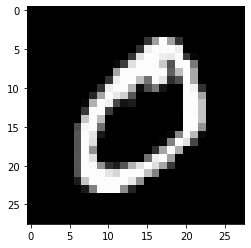

In [4]:
plt.imshow(x_train[1],cmap='gray'),y_train[1]

In [5]:
X_train = []
Y_train = []

In [6]:
for i in range(0,10):
  X_i = [x.reshape((784)) for j,x in enumerate(x_train) if y_train[j]==i]
  X_train.extend(X_i[0:100])
  Y_train.extend([i]*100)

In [7]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
X_train.shape,Y_train.shape

((1000, 784), (1000,))

In [9]:
X_train = X_train.astype('float')/255

## K-Means Algorithm

In [10]:
def clusterAssignment(X,Z):
  C = np.zeros(shape=X.shape[0],dtype='int')
  for i,x in enumerate(X):
     C[i]= np.argmin(np.array([np.linalg.norm(x-z) for z in Z]),axis=0)
  return C

In [11]:
def updateRepresentatives(X,C,k):
  Z = np.zeros(shape=(k,X.shape[1]))
  for i in range(0,k):
    cluster = [x for j,x in enumerate(X) if C[j]==i]
    if(len(cluster)>0):
      Z[i]=sum(cluster)/len(cluster)
  return Z

In [12]:
def calculateJClust(X,Z,C):
  J=0
  for i,x in enumerate(X):
    z=Z[C[i]]
    J+=np.linalg.norm(x-z)
  J/=X.shape[0]
  return J

In [13]:
def runKMeans(Z,X,k,verbose=0):
  JClustPrev=0
  numIter=0
  while(True):
    C = clusterAssignment(X,Z)
    Z = updateRepresentatives(X,C,k)
    JClust= calculateJClust(X,Z,C)
    numIter+=1
    if(verbose==1):
      print("Iteration: "+str(numIter)+" JClust: ",JClust)
    if(abs(JClustPrev-JClust)<1e-9 or numIter>50):
      if(verbose==1):
        print("Convergence Point Reached. Number of iterations: ",numIter)
      break
    JClustPrev=JClust
  return JClust,Z

## Initialisation
1. Random
2. From Data set

In [14]:
def initialiseRandom(X,k):
  Z = np.random.rand(k,X.shape[1])
  return Z

In [15]:
def initialiseFromData(X,k):
  Z = X[np.random.choice(X.shape[0],k,replace=False),:]
  return Z

## Main Function

In [16]:
def run(X,k,isRandom,verbose=0):
  if isRandom:
    Z = initialiseRandom(X,k)
  else:
    Z=initialiseFromData(X,k)
  JClust,Z = runKMeans(Z,X,k,verbose)
  if(verbose==1):
    print("Final JClust: ",JClust)
  return JClust,Z

## Random Initialisation

In [17]:
np.random.seed(0)

### (a) Run Algo for k=20 

In [18]:
JClust,Z = run(X_train,20,True,1)

Iteration: 1 JClust:  6.770737528170011
Iteration: 2 JClust:  6.3032487301651585
Iteration: 3 JClust:  6.142070403480715
Iteration: 4 JClust:  6.0445750402055545
Iteration: 5 JClust:  5.9808158624006245
Iteration: 6 JClust:  5.937253056126858
Iteration: 7 JClust:  5.897912774816969
Iteration: 8 JClust:  5.870722545622701
Iteration: 9 JClust:  5.850422883988627
Iteration: 10 JClust:  5.833552922187079
Iteration: 11 JClust:  5.8182641787498754
Iteration: 12 JClust:  5.7964139250121836
Iteration: 13 JClust:  5.780091739157012
Iteration: 14 JClust:  5.77037976256076
Iteration: 15 JClust:  5.767238268509165
Iteration: 16 JClust:  5.763838285425098
Iteration: 17 JClust:  5.759306760369302
Iteration: 18 JClust:  5.756412528433082
Iteration: 19 JClust:  5.755091613911309
Iteration: 20 JClust:  5.753425073414303
Iteration: 21 JClust:  5.752533153192423
Iteration: 22 JClust:  5.751683149342716
Iteration: 23 JClust:  5.751683149342716
Convergence Point Reached. Number of iterations:  23
Final JCl

The number of iterations are 23.

In [19]:
def plotClusterRepresentatives(Z):
  k = Z.shape[0]
  plt.figure(figsize=(20,10))
  subplot_width = int(math.sqrt(k))
  subplot_heigt=math.ceil(k/subplot_width)
  for i in range(k):
    plt.subplot(subplot_width,subplot_heigt,i+1)
    plt.imshow(Z[i].reshape((28,28)),cmap='gray')

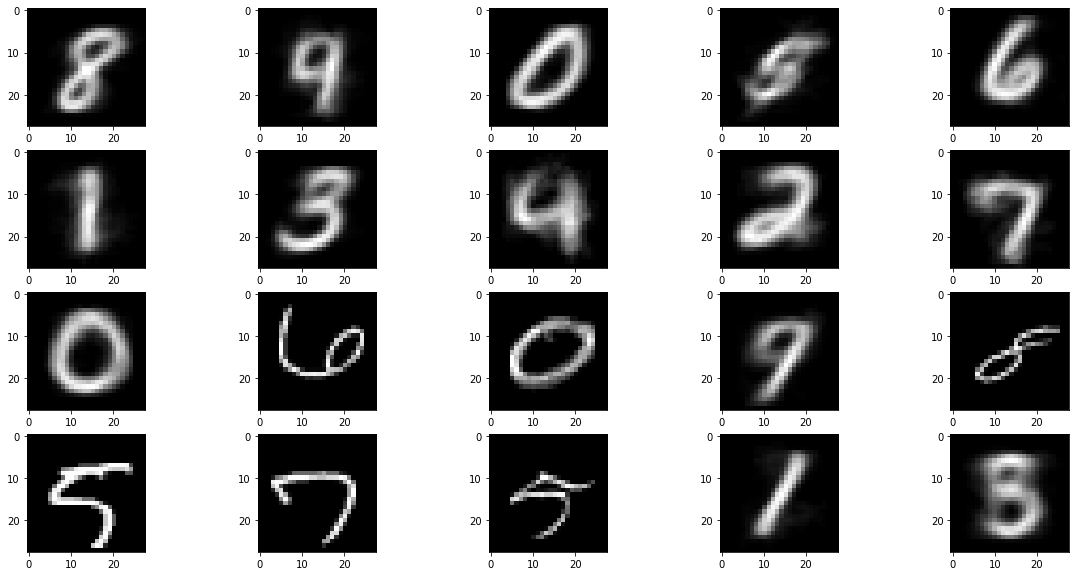

In [20]:
plotClusterRepresentatives(Z)

### b) Get Accuracy on new images

In [21]:
X_test = np.reshape(x_test,(x_test.shape[0],784))[0:50]
Y_test = y_test[0:50]
X_test = X_test.astype('float')/255

In [22]:
def getClusterPreds(Z,Y,C):
  k = Z.shape[0]
  preds = np.zeros(shape=k)
  for i in range(0,k):
    cluster_preds = [y for j,y in enumerate(Y) if C[j]==i]
    if(len(cluster_preds)>0):
      preds[i]=mode(cluster_preds)[0][0]
      # print(pred)
  return preds                       

In [23]:
def getAccuracy(X_train,Y_train,X_test,Y_test,Z):
  C_test = clusterAssignment(X_test,Z)
  C_train = clusterAssignment(X_train,Z)
  cluster_preds = getClusterPreds(Z,Y_train,C_train)
  test_preds = [cluster_preds[C_test[i]] for i in range(len(X_test))]
  correct_count = len([1 for i in range(len(X_test)) if test_preds[i]==Y_test[i]])
  accuracy = correct_count/len(X_test)
  print("Accuracy: " + str(accuracy*100)+"%")
  return accuracy

In [25]:
acc = getAccuracy(X_train,Y_train,X_test,Y_test,Z)

Accuracy: 57.99999999999999%


### (c) Find optimal k

In [48]:
np.random.seed(0)

In [52]:
JClusts=[]

In [53]:
for k in range(5,21):
  JClust,Z = run(X_train,k,True)
  JClusts.append(JClust)
  print("For k="+str(k)+" JClust="+str(JClust))

For k=5 JClust=6.4417873985305025
For k=6 JClust=6.386788987994546
For k=7 JClust=6.2630680711879165
For k=8 JClust=6.159240509716435
For k=9 JClust=6.125603008955211
For k=10 JClust=6.07695789940871
For k=11 JClust=6.023096370471135
For k=12 JClust=5.904465254448122
For k=13 JClust=5.8770654917130765
For k=14 JClust=5.851042898106387
For k=15 JClust=5.804326584882349
For k=16 JClust=5.784803926626413
For k=17 JClust=5.74992970835222
For k=18 JClust=5.763089664873446
For k=19 JClust=5.69955807317288
For k=20 JClust=5.716614945360787


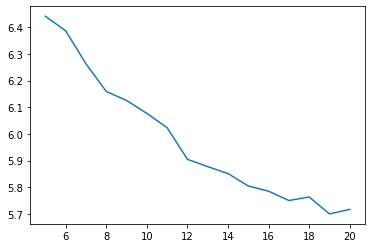

In [54]:
ks = np.arange(5,21, 1)
plt.plot(ks,JClusts)

The optimal k can be found by the elbow method. This is the point where the gradient of the above curve changes significantly. 

This is aroung 12 for the above curve. Therefore optimal k is around 12.

## Choosing Initial Cluster Representatives from Data

In [29]:
np.random.seed(0)

### a) Run for k=20

In [30]:
JClust,Z = run(X_train,20,False,1)

Iteration: 1 JClust:  5.958245712761404
Iteration: 2 JClust:  5.820957568463756
Iteration: 3 JClust:  5.765130403337157
Iteration: 4 JClust:  5.732278327577962
Iteration: 5 JClust:  5.710879880784513
Iteration: 6 JClust:  5.6904702316877085
Iteration: 7 JClust:  5.6723322944057895
Iteration: 8 JClust:  5.659286261493334
Iteration: 9 JClust:  5.646746577860454
Iteration: 10 JClust:  5.632403889010535
Iteration: 11 JClust:  5.6236233087195435
Iteration: 12 JClust:  5.617747897791757
Iteration: 13 JClust:  5.612821084822115
Iteration: 14 JClust:  5.610921068553357
Iteration: 15 JClust:  5.610269958059275
Iteration: 16 JClust:  5.610269958059275
Convergence Point Reached. Number of iterations:  16
Final JClust:  5.610269958059275


The number of iterations are 16

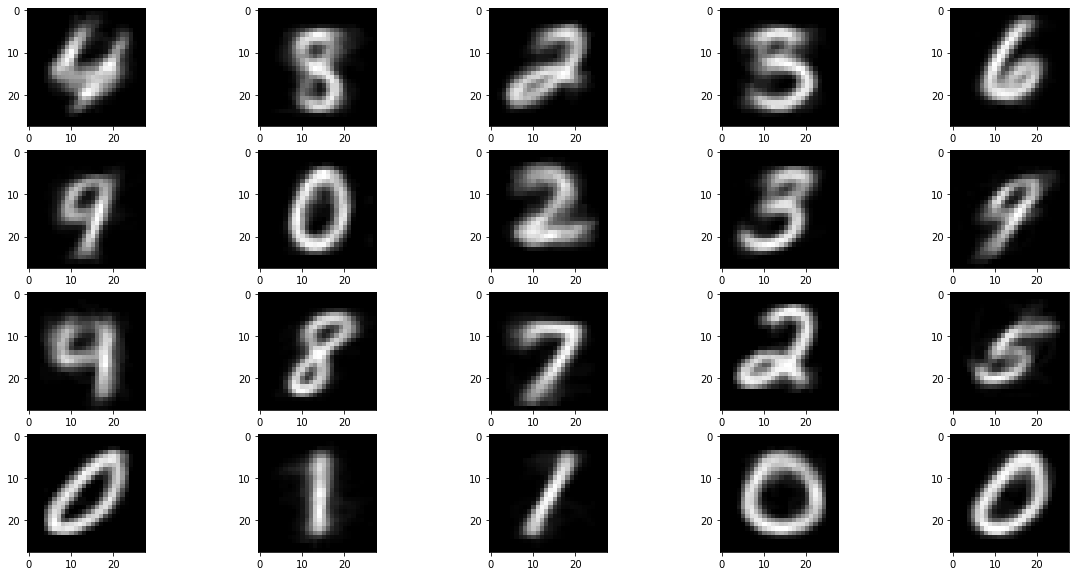

In [31]:
plotClusterRepresentatives(Z)

### b) Get accuracy on new images

In [32]:
X_test = np.reshape(x_test,(x_test.shape[0],784))[0:50]
Y_test = y_test[0:50]
X_test = X_test.astype('float')/255

In [34]:
acc = getAccuracy(X_train,Y_train,X_test,Y_test,Z)

Accuracy: 62.0%


### c) Get optimal k

In [35]:
JClusts=[]

In [37]:
for k in range(5,21):
  JClust,Z = run(X_train,k,False)
  JClusts.append(JClust)
  print("For k="+str(k)+" JClust="+str(JClust))

For k=5 JClust=6.426426049820854
For k=6 JClust=6.34770202809676
For k=7 JClust=6.244840540719731
For k=8 JClust=6.180964984121043
For k=9 JClust=6.095451037299832
For k=10 JClust=6.05010208197846
For k=11 JClust=6.052940040753614
For k=12 JClust=5.927895868960719
For k=13 JClust=5.815896514133724
For k=14 JClust=5.806504062080104
For k=15 JClust=5.813880784589077
For k=16 JClust=5.767270322505432
For k=17 JClust=5.728867542567085
For k=18 JClust=5.655462386936539
For k=19 JClust=5.638264161809674
For k=20 JClust=5.609278146323625


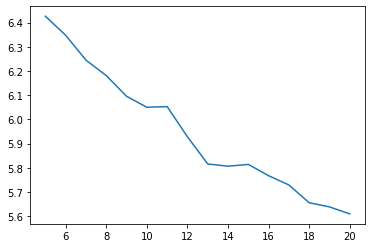

In [38]:
ks = np.arange(5,21, 1)
plt.plot(ks,JClusts)

The optimal k can be found be elbow method to be around 13 as the gradient changes significantly here. 

Thus k=13 is the optimal k

### Does choice of initial condition have an effect on performance
Yes, choice of intial conditions has an effect on performance. We can see that from the accuracies of both types of initialisations. 

We can aso observe that the accuracies are slightly different for every run.

This is because k-means just shifts the cluster representatives a bit. If 2 cluster representatives get assigned close to cluster then they will split it in 2. Which will not occur in a different initialisation and should not occur too. 

The choice of initialisation also affects the speed as it converges faster for cluster representatives chosen from data.

The choice of initialisation does not affect the optimal k though as we can see above that it is kind of same for both runs.